### 1 Cycle
> 필요없는 피쳐 하나만 지우고 진행

In [1]:
import pandas as pd
d_df_origin = pd.read_csv('./datasets/Diabetes Binary Classification.csv')
d_df = d_df_origin.copy()
d_df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### features
1. pregnant - 임신횟수
2. glucose - 포도당
3. blood pressure - 혈압
4. body fat - 체지방
5. insulin - 인슐린
6. BMI - 비만도
7. diabetes - 당뇨병 혈통
8. age - 나이
9. diabetes - 당뇨병 여부

In [2]:
# feature 명 변경
d_df.rename(columns={'Number of times pregnant': 'pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test': 'glucose',\
                     'Diastolic blood pressure (mm Hg)':'blood pressure', 'Triceps skin fold thickness (mm)':'body fat', \
                     '2-Hour serum insulin (mu U/ml)':'insulin', 'Body mass index (weight in kg/(height in m)^2)':'BMI', \
                     'Class variable (0 or 1)':'diabetes', 'Age (years)':'age'}, inplace=True)
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,Diabetes pedigree function,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 사용하지 않을 feature 제거
d_df = d_df.drop(['Diabetes pedigree function'], axis=1)

In [4]:
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [5]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood pressure  768 non-null    int64  
 3   body fat        768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   age             768 non-null    int64  
 7   diabetes        768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


In [6]:
d_df.duplicated().sum()

0

In [7]:
# 양성(당뇨병)인 1의 데이터가 더 적다
d_df.diabetes.value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'blood pressure'}>],
       [<Axes: title={'center': 'body fat'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

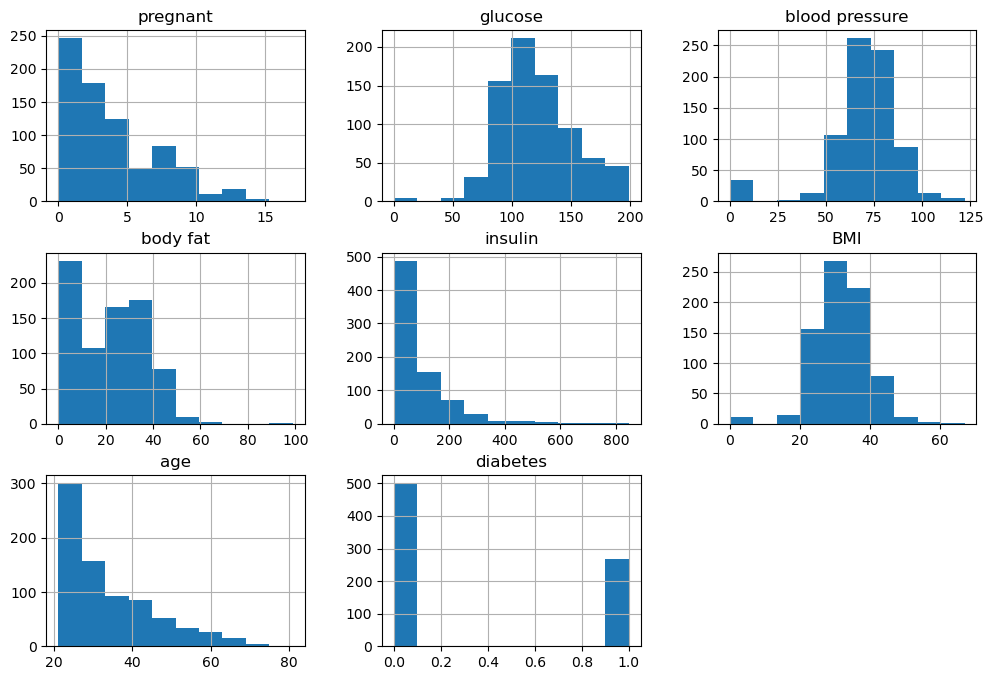

In [8]:
d_df.hist(figsize=(12, 8))

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 분리
features, targets = d_df.iloc[:, :-1], d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(random_state=124)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=124)

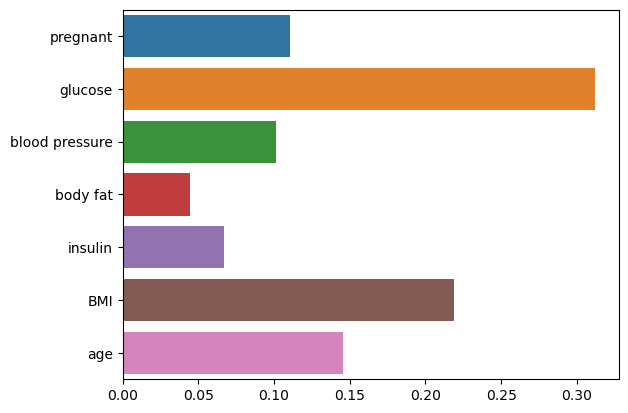

In [13]:
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

- 글루코스와 BMI의 중요도가 가장 높다

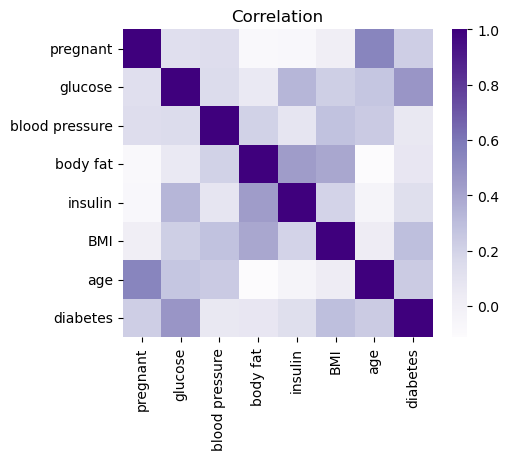

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
corr = d_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [15]:
corr

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.263514,0.466581
blood pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.239528,0.065068
body fat,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.036242,0.292695
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.238356,1.000000


In [16]:
# from sklearn.tree import export_graphviz

# unique_labels = d_df['diabetes'].unique()

# # 클래스 레이블 리스트로 변환
# class_labels = [str(label) for label in unique_labels]

# export_graphviz(
#     dtc, 
#     out_file='./images/diabetes01.dot', 
#     class_names=class_labels, 
#     feature_names=features.columns, 
#     impurity=True, 
#     filled=True
# )

In [17]:
# import graphviz

# with open('./images/diabetes01.dot') as f:
#     diabetes_dtc01 = f.read()

# diabetes_dtc01_graph = graphviz.Source(diabetes_dtc01)

In [18]:
# diabetes_dtc01_graph.render(filename='diabetes01', directory='./images', format='png')

<img src='./images/diabetes01.png'>

- maxdepth 는 14정도

In [19]:
# 전체 행의 특정 데이터 선택하여 피처로 지정, 타겟 데이터를 타겟으로 지정
features_d, targets_d = d_df.iloc[:, [1, -3]], d_df.iloc[:, -1]
features_d

,glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1
...,...,...
763,101,32.9
764,122,36.8
765,121,26.2
766,126,30.1


In [20]:
corr['diabetes'].sort_values(ascending=False)[1:]

glucose           0.466581
BMI               0.292695
age               0.238356
pregnant          0.221898
insulin           0.130548
body fat          0.074752
blood pressure    0.065068
Name: diabetes, dtype: float64

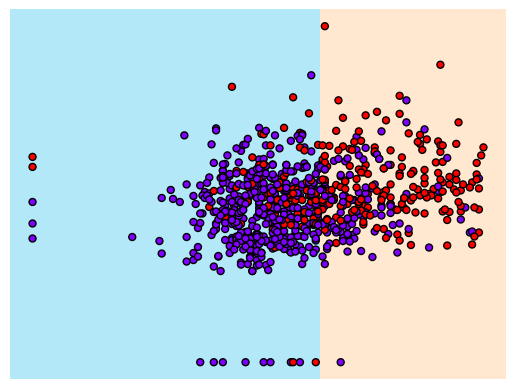

In [21]:
dtc = DecisionTreeClassifier(random_state=124, min_samples_leaf=150)

dtc.fit(features_d, targets_d)

visualize_boundary(dtc, features_d, targets_d)

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### rfc

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    # max_depth : 결정트리의 최대 깊이, 깊을수록 모델은 더 복잡해지고, 더 적합해지지만 과적합의 위험이 있다.
    'max_depth': [13, 14, 15], 
    # min_samples_split : 노드를 분할할 최소 샘플 수, 값이 높을수록 트리를 일반화하고, 모델의 안정성을 향상시킴
    # 적절한 값은 모델의 일반화 성능이 향상되고, 과적합을 방지한다.
    'min_samples_split': [110, 120, 130, 140, 150]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=50),
             n_jobs=-1,
             param_grid={'max_depth': [13, 14, 15],
                         'min_samples_split': [110, 120, 130, 140, 150]})

In [24]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 13, 'min_samples_split': 110}",0.747700,4
1,"{'max_depth': 13, 'min_samples_split': 120}",0.739662,9
2,"{'max_depth': 13, 'min_samples_split': 130}",0.754283,1
3,"{'max_depth': 13, 'min_samples_split': 140}",0.742861,8
4,"{'max_depth': 13, 'min_samples_split': 150}",0.737996,12
5,"{'max_depth': 14, 'min_samples_split': 110}",0.749418,3
6,"{'max_depth': 14, 'min_samples_split': 120}",0.749471,2
7,"{'max_depth': 14, 'min_samples_split': 130}",0.747700,5
8,"{'max_depth': 14, 'min_samples_split': 140}",0.739635,10
9,"{'max_depth': 14, 'min_samples_split': 150}",0.733078,15


In [25]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

In [26]:
rfc

RandomForestClassifier(max_depth=13, min_samples_split=130, n_estimators=50)

오차 행렬
[[93  7]
 [26 28]]
정확도: 0.7857, 정밀도: 0.8000, 재현율: 0.5185, F1: 0.6292, ROC-AUC: 0.7243
################################################################################


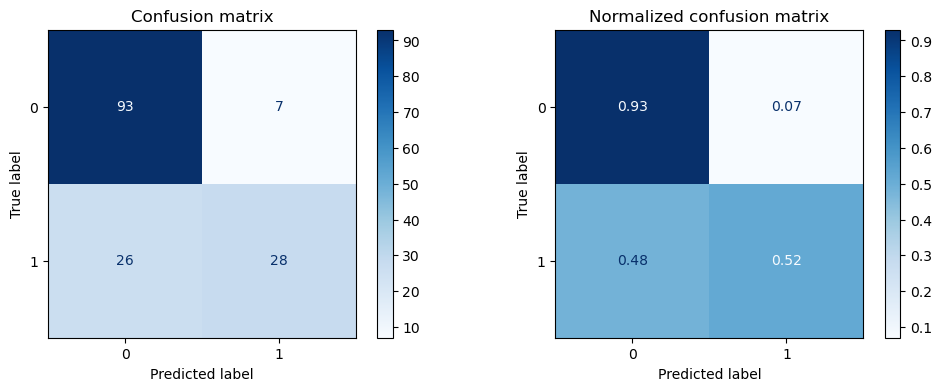

In [27]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

- 랜덤포레스트는 정확도와 정밀도가 정말 높게 나왔으며, F1스코어와 ROC-AUC또한 높은 수치를 보이며, 재현율또한 나쁘지 않은 수치를보입니다.
- 재현율이 낮은것은 타겟의 불균형 때문인 것으로 추정

#### gbc

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    # n_estimators가 높을수록 모델이 복잡해지고 과적합 위험이 있다
    'n_estimators': [50, 100, 150],
    # learning_rate : 각 트리의 가중치를 부여한다. 낮을수록 모델이 안정적이고 과적합의 위험을 줄여준다.
    # 하지만 낮을수록 트리가 더 많이 필요할 수 있다.
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [29]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.726483,4
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.723217,6
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.724857,5
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.721591,7
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.719979,8
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.715101,9
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.746008,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.731347,2
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.728082,3
9,"{'learning_rate': 1, 'n_estimators': 50}",0.711795,11


In [30]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

In [31]:
gbc

GradientBoostingClassifier(learning_rate=0.7, n_estimators=50)

오차 행렬
[[80 20]
 [18 36]]
정확도: 0.7532, 정밀도: 0.6429, 재현율: 0.6667, F1: 0.6545, ROC-AUC: 0.7333
################################################################################


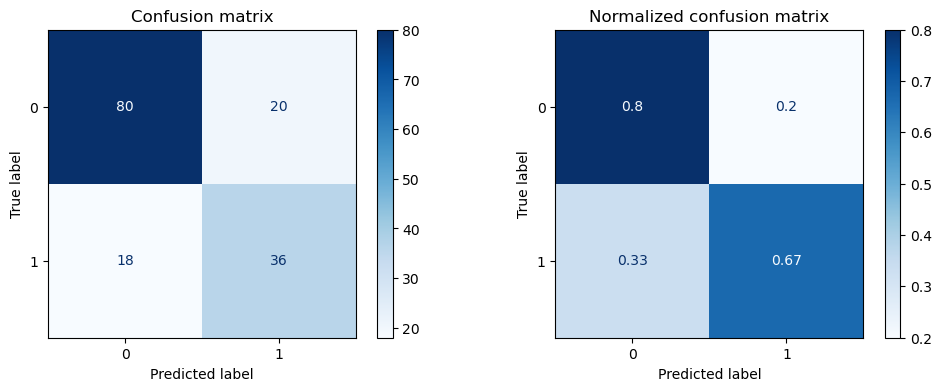

In [32]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

- 꽤 높은 정확도와 ROC스코어 및 정밀도, 재현율등 모든 수치가 꽤 고르게 나타났다.

#### xgb

In [33]:
from xgboost import XGBClassifier

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

# early_stopping_rounds : 값만큼 연속으로 성능이 향상되지 않으면 훈련을 조기 종료
# eval_set : 조기 중단을 위해 사용될 검증 데이터셋을 지정
g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.47826	validation_1-logloss:0.45109
[1]	validation_0-logloss:0.39712	validation_1-logloss:0.37621
[2]	validation_0-logloss:0.33530	validation_1-logloss:0.32239
[3]	validation_0-logloss:0.29691	validation_1-logloss:0.27726
[4]	validation_0-logloss:0.27231	validation_1-logloss:0.25486
[5]	validation_0-logloss:0.25100	validation_1-logloss:0.22706
[6]	validation_0-logloss:0.24123	validation_1-logloss:0.21601
[7]	validation_0-logloss:0.22799	validation_1-logloss:0.19545
[8]	validation_0-logloss:0.20622	validation_1-logloss:0.17775
[9]	validation_0-logloss:0.19366	validation_1-logloss:0.16285
[10]	validation_0-logloss:0.18266	validation_1-logloss:0.15344
[11]	validation_0-logloss:0.16564	validation_1-logloss:0.14408
[12]	validation_0-logloss:0.15307	validation_1-logloss:0.13159
[13]	validation_0-logloss:0.14243	validation_1-logloss:0.12295
[14]	validation_0-logloss:0.13594	validation_1-logloss:0.11547
[15]	validation_0-logloss:0.12543	validation_1-logloss:0.10393
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[118]	validation_0-logloss:0.01922	validation_1-logloss:0.01690
[119]	validation_0-logloss:0.01914	validation_1-logloss:0.01683
[120]	validation_0-logloss:0.01903	validation_1-logloss:0.01662
[121]	validation_0-logloss:0.01895	validation_1-logloss:0.01632
[122]	validation_0-logloss:0.01883	validation_1-logloss:0.01631
[123]	validation_0-logloss:0.01874	validation_1-logloss:0.01632
[124]	validation_0-logloss:0.01857	validation_1-logloss:0.01637
[125]	validation_0-logloss:0.01850	validation_1-logloss:0.01614
[126]	validation_0-logloss:0.01841	validation_1-logloss:0.01605
[127]	validation_0-logloss:0.01832	validation_1-logloss:0.01600
[128]	validation_0-logloss:0.01823	validation_1-logloss:0.01585
[129]	validation_0-logloss:0.01815	validation_1-logloss:0.01585
[130]	validation_0-logloss:0.01806	validation_1-logloss:0.01571
[131]	validation_0-logloss:0.01798	validation_1-logloss:0.01558
[132]	validation_0-logloss:0.01789	validation_1-logloss:0.01555
[133]	validation_0-logloss:0.01782	valid

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [35]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.718326,10
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.723244,3
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.718326,10
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.718339,9
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.726469,2
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.728095,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.723124,4
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.723124,4
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.723124,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.718326,10


In [36]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

오차 행렬
[[80 20]
 [15 39]]
정확도: 0.7727, 정밀도: 0.6610, 재현율: 0.7222, F1: 0.6903, ROC-AUC: 0.7611
################################################################################


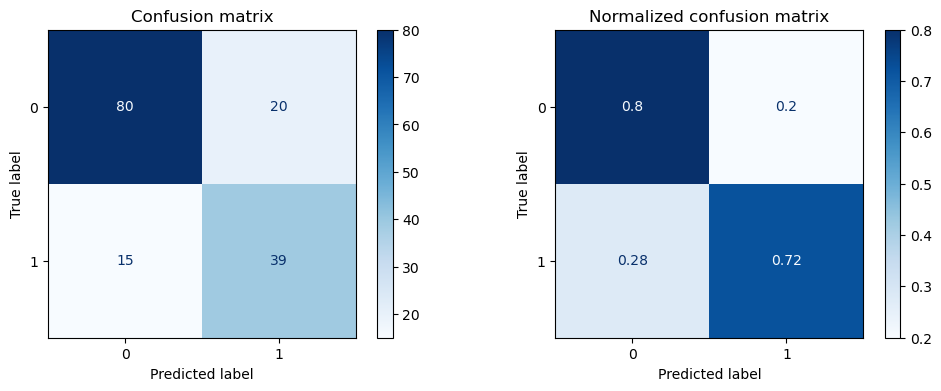

In [37]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

- xgb는 특이하게 재현율이 꽤 높게 나왔다

#### lgbm

In [38]:
from lightgbm import LGBMClassifier

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [39]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.729775,2
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.726496,6
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.721591,8
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.728055,5
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.733000,1
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.728162,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.719925,9
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.724830,7
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.728095,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.692270,12


In [40]:
lgbm = g_lgbm.best_estimator_

lgbm_prediction = lgbm.predict(X_test)

In [41]:
lgbm

LGBMClassifier(learning_rate=0.5)

오차 행렬
[[80 20]
 [16 38]]
정확도: 0.7662, 정밀도: 0.6552, 재현율: 0.7037, F1: 0.6786, ROC-AUC: 0.7519
################################################################################


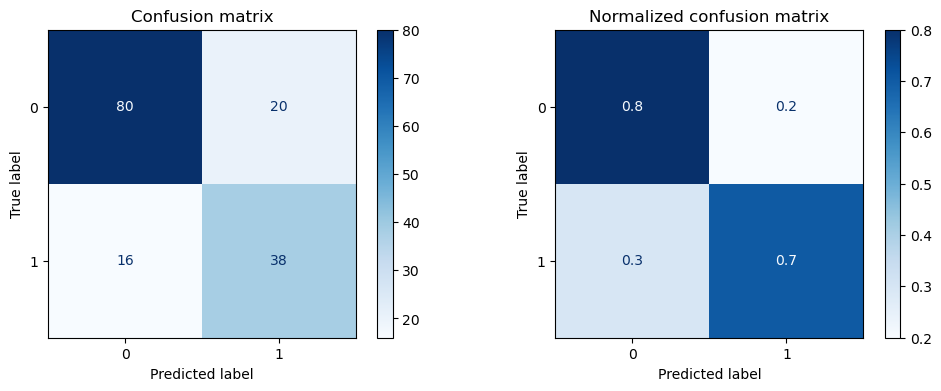

In [42]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

- lgbm 또한 재현율이 좀 높으나, F1스코어가 조금 낮아진 모습이다.

Model		Accuracy	Precision	Recall		F1 Score
rfc		0.7857		0.8000		0.5185		0.6292
gbc		0.7532		0.6429		0.6667		0.6545
xgb		0.7727		0.6610		0.7222		0.6903
lgbm		0.7662		0.6552		0.7037		0.6786


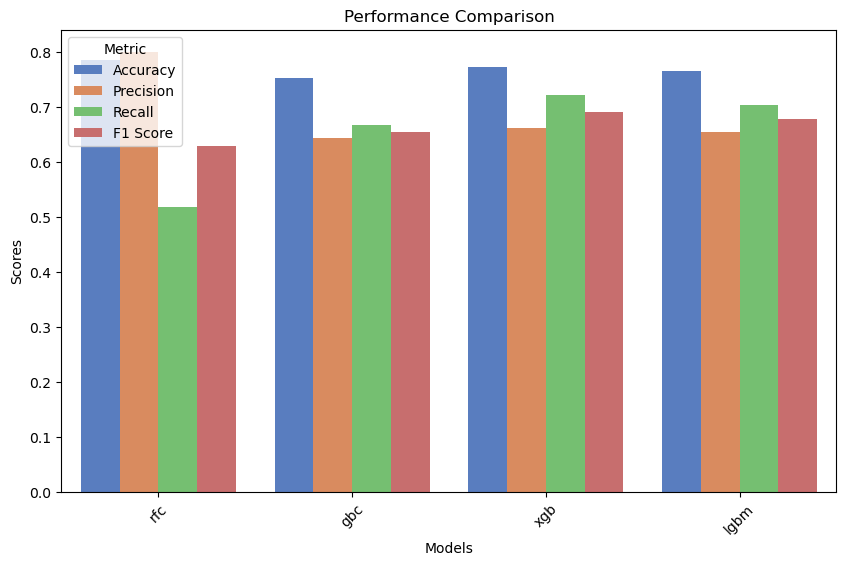

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ['rfc', 'gbc', 'xgb', 'lgbm']

accuracies = [accuracy_score(y_test, rfc_prediction), accuracy_score(y_test, gbc_prediction),
              accuracy_score(y_test, xgb_prediction), accuracy_score(y_test, lgbm_prediction)]

precisions = [precision_score(y_test, rfc_prediction), precision_score(y_test, gbc_prediction),
              precision_score(y_test, xgb_prediction), precision_score(y_test, lgbm_prediction)]

recalls = [recall_score(y_test, rfc_prediction), recall_score(y_test, gbc_prediction),
           recall_score(y_test, xgb_prediction), recall_score(y_test, lgbm_prediction)]

f1_scores = [f1_score(y_test, rfc_prediction), f1_score(y_test, gbc_prediction),
             f1_score(y_test, xgb_prediction), f1_score(y_test, lgbm_prediction)]

# 성능 지표 출력
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for i in range(len(model_names)):
    print(f"{model_names[i]}\t\t{accuracies[i]:.4f}\t\t{precisions[i]:.4f}\t\t{recalls[i]:.4f}\t\t{f1_scores[i]:.4f}")

# 데이터프레임 생성
import pandas as pd
data = pd.DataFrame({
    'Model': model_names * 4,
    'Metric': ['Accuracy'] * 4 + ['Precision'] * 4 + ['Recall'] * 4 + ['F1 Score'] * 4,
    'Score': accuracies + precisions + recalls + f1_scores
})

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=data, palette='muted')
plt.title('Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

- 정밀도는 rfc가 높지만 종합적이게 xgb가 가장 높았다.

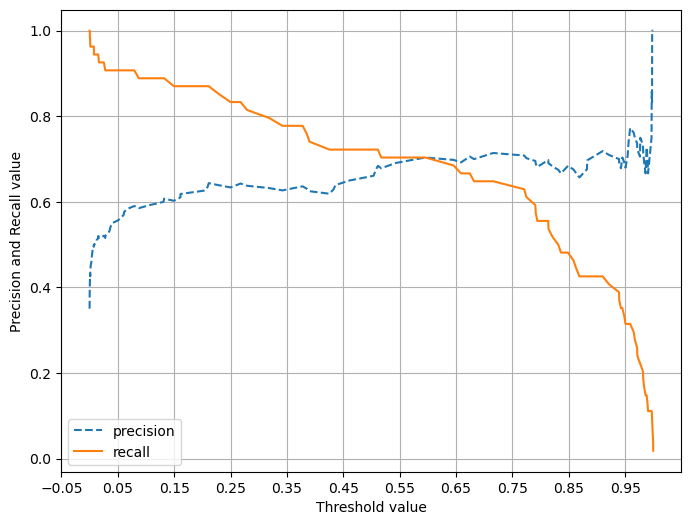

In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

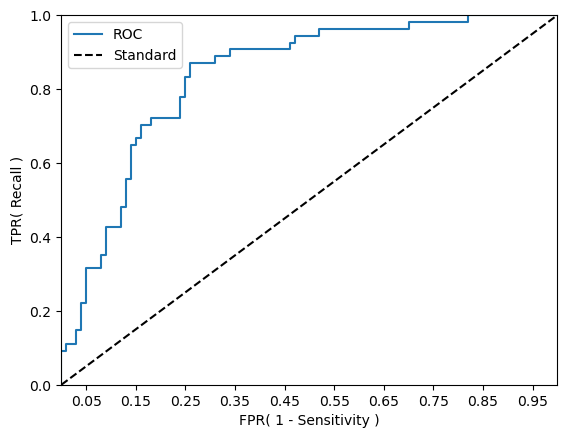

In [45]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

- 데이터 수가 많지 않아서 구불구불하지만 모양 자체는 나쁘지 않은 것 같다.

### 1 Cycle 결과
- 전처리를 하지않았음에도 사용한 네개 모델 전부 꽤 좋은 성능을 보이긴하나, 데이터불균형을 조금 해결하고 실제 데이터를 가정했을 때
- 체지방과 인슐린이 0인것은 말이 안되기 때문에 0인 값을 제거하고, 샘플링을 진행해볼 것

### 2 Cycle
> 일반화, 이상치 제거 및 오버 샘플링

In [154]:
import pandas as pd
d_df_origin = pd.read_csv('./datasets/Diabetes Binary Classification.csv')
d_df = d_df_origin.copy()
d_df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [155]:
# feature 명 변경
d_df.rename(columns={'Number of times pregnant': 'pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test': 'glucose',\
                     'Diastolic blood pressure (mm Hg)':'blood pressure', 'Triceps skin fold thickness (mm)':'body fat', \
                     '2-Hour serum insulin (mu U/ml)':'insulin', 'Body mass index (weight in kg/(height in m)^2)':'BMI', \
                     'Class variable (0 or 1)':'diabetes', 'Age (years)':'age'}, inplace=True)
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,Diabetes pedigree function,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [156]:
# 사용하지 않을 feature 제거
d_df = d_df.drop(['Diabetes pedigree function'], axis=1)

In [157]:
# body fat의 0인 값 제거
d_df = d_df[d_df['body fat'] != 0]
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
6,3,78,50,32,88,31.0,26,1
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,43,1
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0


In [158]:
# 인슐린의 0인 값 제거
d_df = d_df[d_df['insulin'] != 0]
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
6,3,78,50,32,88,31.0,26,1
8,2,197,70,45,543,30.5,53,1
13,1,189,60,23,846,30.1,59,1
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,26,1
755,1,128,88,39,110,36.5,37,1
760,2,88,58,26,16,28.4,22,0
763,10,101,76,48,180,32.9,63,0


In [159]:
import numpy as np
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

features = ['pregnant', 'glucose', 'blood pressure', 'body fat', 'insulin', 'BMI', 'age']

total_count = d_df.shape[0]
for feature in features:
    std_df = std.fit_transform(d_df[[feature]])
    count = ((std_df < -1.96) | (std_df > 1.96)).sum()
    print(f'{feature}: {count}건, {np.round(count / total_count * 100, 4)}%')

pregnant: 22건, 5.5838%
glucose: 19건, 4.8223%
blood pressure: 18건, 4.5685%
body fat: 12건, 3.0457%
insulin: 21건, 5.3299%
BMI: 10건, 2.5381%
age: 28건, 7.1066%


In [160]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_d = std.fit_transform(d_df.iloc[:, :-1])

In [161]:
std_d = pd.DataFrame(std_d, columns=d_df.iloc[:, :-1].columns)
std_d['weather'] = d_df.diabetes
std_d

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,weather
0,-0.713386,-1.062114,-0.373759,-0.582083,-0.518847,-0.678875,-0.963548,NaN
1,-1.025344,0.468651,-2.461427,0.561761,0.104968,1.404168,0.214537,NaN
2,-0.089470,-1.412915,-1.658478,0.275800,-0.569426,-0.276153,-0.472679,NaN
3,-0.401428,2.382108,-0.052579,1.514965,3.266189,-0.345588,2.178012,0.0
4,-0.713386,2.126981,-0.855528,-0.582083,5.820456,-0.401136,2.767055,1.0
...,...,...,...,...,...,...,...,...
389,-1.025344,1.871853,1.392730,1.419645,2.988002,1.431942,-0.472679,0.0
390,-0.713386,0.181633,1.392730,0.943043,-0.383968,0.487629,0.607232,0.0
391,-0.401428,-1.094005,-1.016118,-0.296122,-1.176381,-0.637214,-0.865374,NaN
392,2.094236,-0.679423,0.429191,1.800926,0.206127,-0.012301,3.159750,0.0


In [162]:
# 이상치 제거
features = std_d.iloc[:, :-1]
for column in features.columns:
    std_d.drop(
        std_d[~std_d[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_d[~std_d[column].between(-1.96, 1.96)].shape[0]}건')

pregnant: 0건
glucose: 0건
blood pressure: 0건
body fat: 0건
insulin: 0건
BMI: 0건
age: 0건


In [163]:
d_df = d_df.iloc[std_d.index].reset_index(drop=True)
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
0,1,89,66,23,94,28.1,21,0
1,3,78,50,32,88,31.0,26,1
2,0,118,84,47,230,45.8,31,1
3,1,115,70,30,96,34.6,32,1
4,3,126,88,41,235,39.3,27,0
...,...,...,...,...,...,...,...,...
287,1,81,74,41,57,46.3,32,0
288,1,121,78,39,74,39.0,28,0
289,1,128,88,39,110,36.5,37,1
290,2,88,58,26,16,28.4,22,0


array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'blood pressure'}>],
       [<Axes: title={'center': 'body fat'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

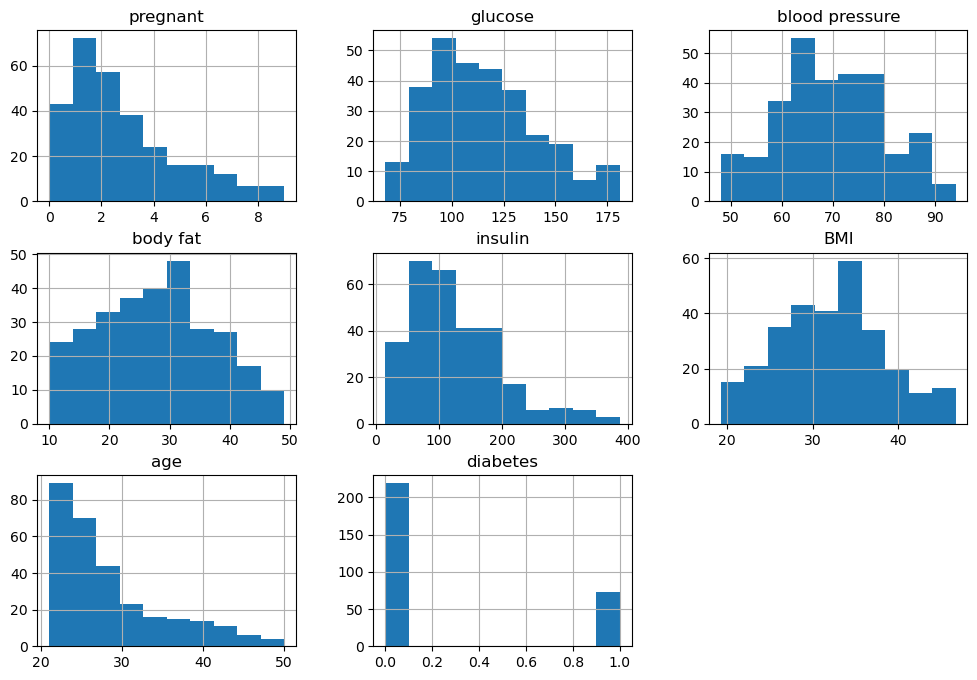

In [164]:
d_df.hist(figsize=(12, 8))

- body fat과 insulin의 0을 제거하고, 이상치를 제거하니 위의 히스토그램보다 훨씬 나아진 모습이다.
- 그럼에도 pregnant와 age, insulin의 차이가 꽤 있는 모습이다

In [165]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = d_df.iloc[:, :-1], d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(random_state=124)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=124)

In [167]:
# from sklearn.tree import export_graphviz

# unique_labels = d_df['diabetes'].unique()

# # 클래스 레이블 리스트로 변환
# class_labels = [str(label) for label in unique_labels]

# export_graphviz(
#     dtc, 
#     out_file='./images/diabetes03.dot', 
#     class_names=class_labels, 
#     feature_names=features.columns, 
#     impurity=True, 
#     filled=True
# )

In [168]:
# import graphviz

# with open('./images/diabetes03.dot') as f:
#     mushroom_dtc03 = f.read()

# diabetes_dtc03_graph = graphviz.Source(mushroom_dtc03)

In [169]:
# diabetes_dtc03_graph.render(filename='diabetes03', directory='./images', format='png')

<img src='./images/diabetes03.png'>

In [170]:
# 전체 행의 특정 데이터 선택하여 피처로 지정, 타겟 데이터를 타겟으로 지정
features_d, targets_d = d_df.iloc[:, [1, -3]], d_df.iloc[:, -1]

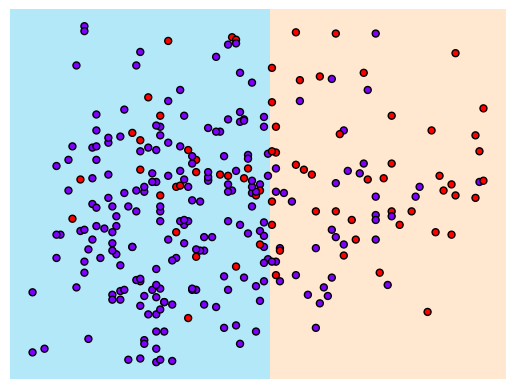

In [171]:
dtc = DecisionTreeClassifier(random_state=124, min_samples_leaf=50)

dtc.fit(features_d, targets_d)

visualize_boundary(dtc, features_d, targets_d)

In [172]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = d_df.iloc[:, :-1], d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# target피쳐의 불균형을 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

diabetes
0    175
1    175
Name: count, dtype: int64

#### rfc

In [173]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [10, 11, 12], 
    'min_samples_split': [30, 40, 50, 60, 70]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=50),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [30, 40, 50, 60, 70]})

In [174]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 30}",0.828571,4
1,"{'max_depth': 10, 'min_samples_split': 40}",0.822857,5
2,"{'max_depth': 10, 'min_samples_split': 50}",0.808571,13
3,"{'max_depth': 10, 'min_samples_split': 60}",0.814286,9
4,"{'max_depth': 10, 'min_samples_split': 70}",0.791429,15
5,"{'max_depth': 11, 'min_samples_split': 30}",0.822857,5
6,"{'max_depth': 11, 'min_samples_split': 40}",0.831429,3
7,"{'max_depth': 11, 'min_samples_split': 50}",0.817143,7
8,"{'max_depth': 11, 'min_samples_split': 60}",0.808571,13
9,"{'max_depth': 11, 'min_samples_split': 70}",0.811429,11


In [175]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

In [176]:
rfc

RandomForestClassifier(max_depth=12, min_samples_split=30, n_estimators=50)

오차 행렬
[[34 10]
 [ 6  9]]
정확도: 0.7288, 정밀도: 0.4737, 재현율: 0.6000, F1: 0.5294, ROC-AUC: 0.6864
################################################################################


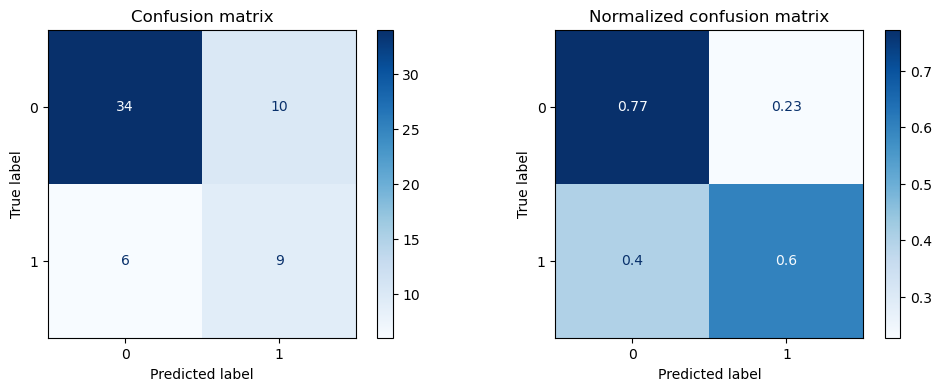

In [177]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

> 1cycle rfc : 정확도: 0.7987, 정밀도: 0.7805, 재현율: 0.5926, F1: 0.6737, ROC-AUC: 0.7513  
> 2cycle rfc : 정확도: 0.7288, 정밀도: 0.4737, 재현율: 0.6000, F1: 0.5294, ROC-AUC: 0.6864

- 1cycle에 비해 정밀도가 많이 떨어졌으며 재현율이 조금 오른 모습

#### gbc

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    # n_estimators가 높을수록 모델이 복잡해지고 과적합 위험이 있다
    'n_estimators': [50, 100, 150, 200, 300, 400],
    # learning_rate : 각 트리의 가중치를 부여한다. 낮을수록 모델이 안정적이고 과적합의 위험을 줄여준다.
    # 하지만 낮을수록 트리가 더 많이 필요할 수 있다.
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200, 300, 400]})

In [179]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.822857,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.820000,13
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.817143,14
3,"{'learning_rate': 0.3, 'n_estimators': 200}",0.822857,9
4,"{'learning_rate': 0.3, 'n_estimators': 300}",0.822857,9
5,"{'learning_rate': 0.3, 'n_estimators': 400}",0.822857,8
6,"{'learning_rate': 0.5, 'n_estimators': 50}",0.822857,9
7,"{'learning_rate': 0.5, 'n_estimators': 100}",0.808571,22
8,"{'learning_rate': 0.5, 'n_estimators': 150}",0.802857,24
9,"{'learning_rate': 0.5, 'n_estimators': 200}",0.808571,22


In [180]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

In [181]:
gbc

GradientBoostingClassifier(learning_rate=1)

오차 행렬
[[37  7]
 [ 8  7]]
정확도: 0.7458, 정밀도: 0.5000, 재현율: 0.4667, F1: 0.4828, ROC-AUC: 0.6538
################################################################################


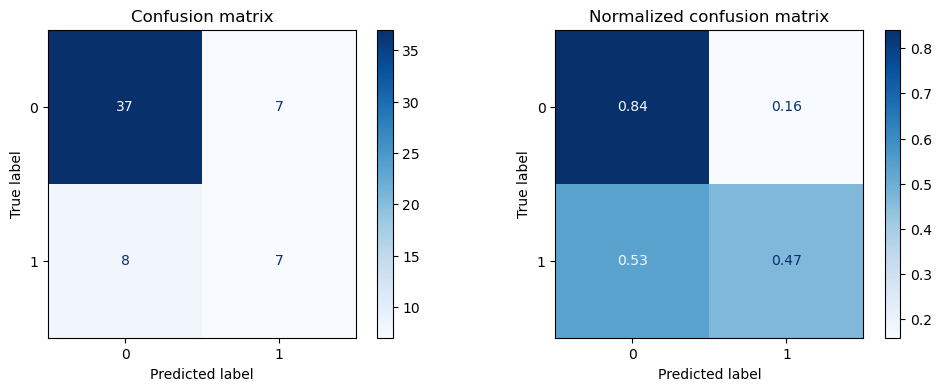

In [182]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

> 1cycle gbc : 정확도: 0.7532, 정밀도: 0.6429, 재현율: 0.6667, F1: 0.6545, ROC-AUC: 0.7333  
> 2cycle gbc : 정확도: 0.7458, 정밀도: 0.5000, 재현율: 0.4667, F1: 0.4828, ROC-AUC: 0.6538

- 정확도는 비슷하지만 모든 수치가 떨어졌다

#### xgb

In [183]:
from xgboost import XGBClassifier

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [184]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.35480	validation_1-logloss:0.40818
[1]	validation_0-logloss:0.23615	validation_1-logloss:0.26861
[2]	validation_0-logloss:0.18312	validation_1-logloss:0.19683
[3]	validation_0-logloss:0.13562	validation_1-logloss:0.12530
[4]	validation_0-logloss:0.11144	validation_1-logloss:0.10000
[5]	validation_0-logloss:0.08844	validation_1-logloss:0.08086
[6]	validation_0-logloss:0.07349	validation_1-logloss:0.06458
[7]	validation_0-logloss:0.06207	validation_1-logloss:0.06340
[8]	validation_0-logloss:0.05495	validation_1-logloss:0.05597
[9]	validation_0-logloss:0.04789	validation_1-logloss:0.05430
[10]	validation_0-logloss:0.04474	validation_1-logloss:0.04550
[11]	validation_0-logloss:0.04129	validation_1-logloss:0.04097
[12]	validation_0-logloss:0.03999	validation_1-logloss:0.03535
[13]	validation_0-logloss:0.03835	validation_1-logloss:0.03605
[14]	validation_0-logloss:0.03656	validation_1-logloss:0.03062
[15]	validation_0-logloss:0.03582	validation_1-logloss:0.02918
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200, 250]},
             return_train_score=True)

In [185]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.834286,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.837143,9
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.840000,3
3,"{'learning_rate': 0.3, 'n_estimators': 200}",0.840000,3
4,"{'learning_rate': 0.3, 'n_estimators': 250}",0.840000,3
5,"{'learning_rate': 0.5, 'n_estimators': 50}",0.820000,20
6,"{'learning_rate': 0.5, 'n_estimators': 100}",0.825714,16
7,"{'learning_rate': 0.5, 'n_estimators': 150}",0.825714,16
8,"{'learning_rate': 0.5, 'n_estimators': 200}",0.825714,16
9,"{'learning_rate': 0.5, 'n_estimators': 250}",0.822857,19


In [186]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

In [187]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

오차 행렬
[[33 11]
 [ 7  8]]
정확도: 0.6949, 정밀도: 0.4211, 재현율: 0.5333, F1: 0.4706, ROC-AUC: 0.6417
################################################################################


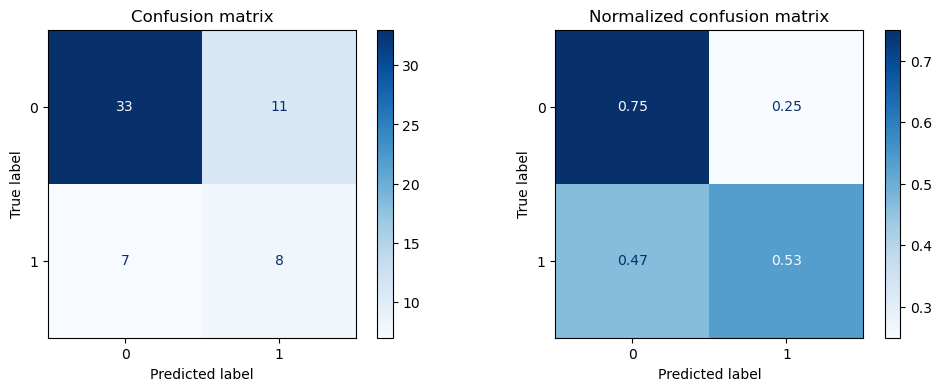

In [188]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

> 1cycle xgb : 정확도: 0.7727, 정밀도: 0.6610, 재현율: 0.7222, F1: 0.6903, ROC-AUC: 0.7611  
> 2cycle xgb : 정확도: 0.6949, 정밀도: 0.4211, 재현율: 0.5333, F1: 0.4706, ROC-AUC: 0.6417

- xgb또한 모든 수치가 더 떨어진 모습이다

#### lgbm

In [189]:
from lightgbm import LGBMClassifier

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 175, number of negative: 175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [190]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.834286,6
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.845714,2
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.842857,5
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.822857,9
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.825714,8
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.834286,6
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.808571,10
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.808571,10
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.808571,10
9,"{'learning_rate': 1, 'n_estimators': 50}",0.848571,1


In [191]:
lgbm = g_lgbm.best_estimator_

lgbm_prediction = lgbm.predict(X_test)

In [192]:
lgbm

LGBMClassifier(learning_rate=1, n_estimators=50)

오차 행렬
[[38  6]
 [ 7  8]]
정확도: 0.7797, 정밀도: 0.5714, 재현율: 0.5333, F1: 0.5517, ROC-AUC: 0.6985
################################################################################


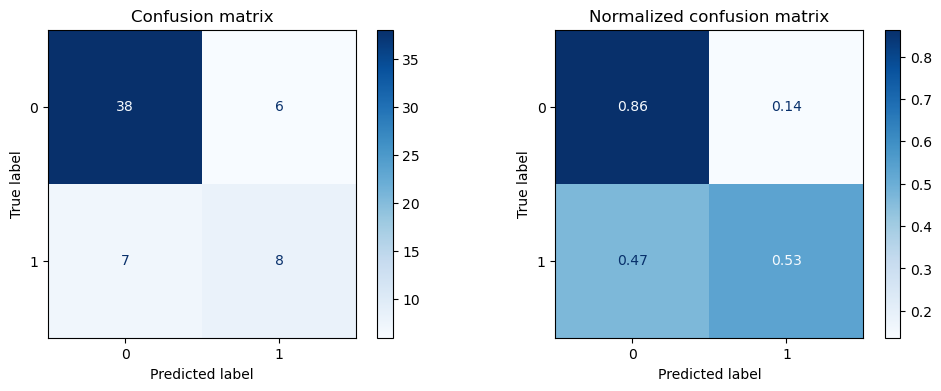

In [193]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

> 1cycle lgbm : 정확도: 0.7662, 정밀도: 0.6552, 재현율: 0.7037, F1: 0.6786, ROC-AUC: 0.7519  
> 2cycle lgbm : 정확도: 0.7797, 정밀도: 0.5714, 재현율: 0.5333, F1: 0.5517, ROC-AUC: 0.6985

- 정확도만 미세하게 상승하였고 또 다 떨어진 모습이다

Model		Accuracy	Precision	Recall		F1 Score
rfc		0.7288		0.4737		0.6000		0.5294
gbc		0.7458		0.5000		0.4667		0.4828
xgb		0.6949		0.4211		0.5333		0.4706
lgbm		0.7797		0.5714		0.5333		0.5517


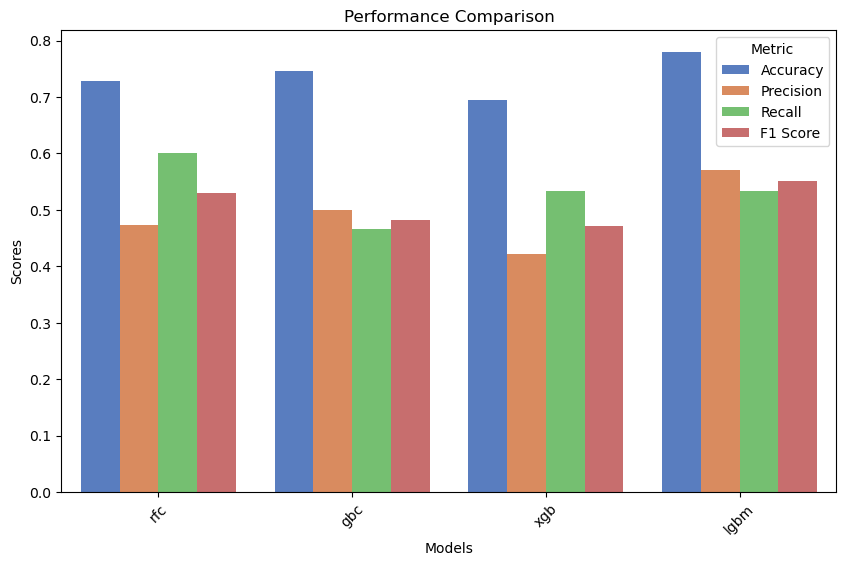

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ['rfc', 'gbc', 'xgb', 'lgbm']

accuracies = [accuracy_score(y_test, rfc_prediction), accuracy_score(y_test, gbc_prediction),
              accuracy_score(y_test, xgb_prediction), accuracy_score(y_test, lgbm_prediction)]

precisions = [precision_score(y_test, rfc_prediction), precision_score(y_test, gbc_prediction),
              precision_score(y_test, xgb_prediction), precision_score(y_test, lgbm_prediction)]

recalls = [recall_score(y_test, rfc_prediction), recall_score(y_test, gbc_prediction),
           recall_score(y_test, xgb_prediction), recall_score(y_test, lgbm_prediction)]

f1_scores = [f1_score(y_test, rfc_prediction), f1_score(y_test, gbc_prediction),
             f1_score(y_test, xgb_prediction), f1_score(y_test, lgbm_prediction)]

# 성능 지표 출력
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for i in range(len(model_names)):
    print(f"{model_names[i]}\t\t{accuracies[i]:.4f}\t\t{precisions[i]:.4f}\t\t{recalls[i]:.4f}\t\t{f1_scores[i]:.4f}")

# 데이터프레임 생성
import pandas as pd
data = pd.DataFrame({
    'Model': model_names * 4,
    'Metric': ['Accuracy'] * 4 + ['Precision'] * 4 + ['Recall'] * 4 + ['F1 Score'] * 4,
    'Score': accuracies + precisions + recalls + f1_scores
})

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=data, palette='muted')
plt.title('Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

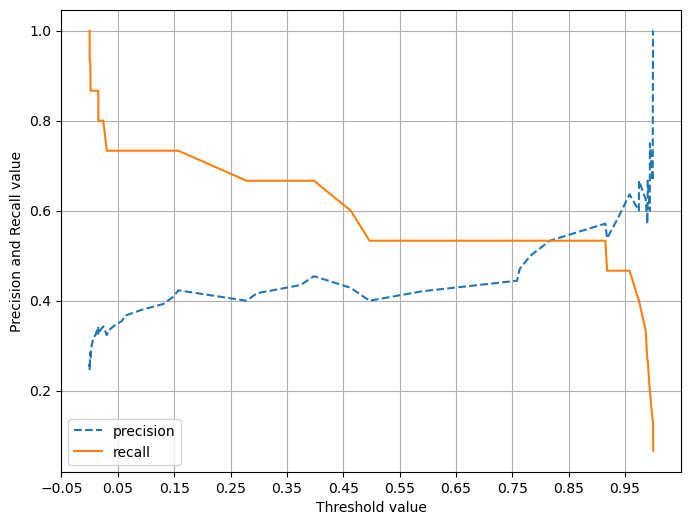

In [195]:
precision_recall_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

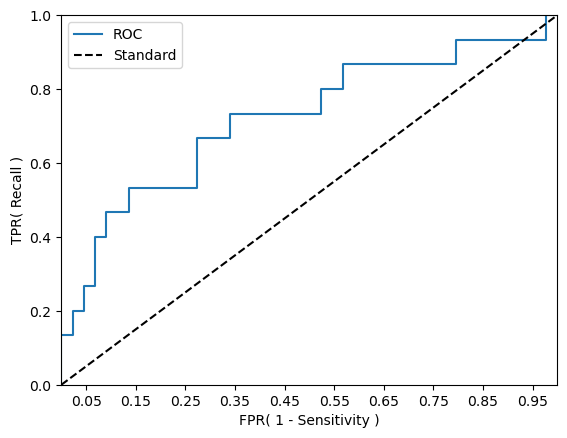

In [196]:
roc_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

### 2Cycle 결론
- 0인값을 제거하고(일반화), 이상치 제거, 타겟 오버샘플링을 하였더니 각 모델들의 모든 수치가 대부분 낮아졌다.

### 3Cycle
- 타겟을 언더샘플링 해보기

In [197]:
import pandas as pd
d_df_origin = pd.read_csv('./datasets/Diabetes Binary Classification.csv')
d_df = d_df_origin.copy()
d_df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [198]:
# feature 명 변경
d_df.rename(columns={'Number of times pregnant': 'pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test': 'glucose',\
                     'Diastolic blood pressure (mm Hg)':'blood pressure', 'Triceps skin fold thickness (mm)':'body fat', \
                     '2-Hour serum insulin (mu U/ml)':'insulin', 'Body mass index (weight in kg/(height in m)^2)':'BMI', \
                     'Class variable (0 or 1)':'diabetes', 'Age (years)':'age'}, inplace=True)
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,Diabetes pedigree function,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [199]:
# 사용하지 않을 feature 제거
d_df = d_df.drop(['Diabetes pedigree function'], axis=1)

In [200]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_d = std.fit_transform(d_df.iloc[:, :-1])

In [201]:
std_d = pd.DataFrame(std_d, columns=d_df.iloc[:, :-1].columns)
std_d['diabetes'] = d_df.diabetes
std_d

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,-0.020496,1
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,1.170732,1


In [202]:
# 이상치 제거
features = std_d.iloc[:, :-1]
for column in features.columns:
    std_d.drop(
        std_d[~std_d[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_d[~std_d[column].between(-1.96, 1.96)].shape[0]}건')

pregnant: 0건
glucose: 0건
blood pressure: 0건
body fat: 0건
insulin: 0건
BMI: 0건
age: 0건


In [203]:
d_df = d_df.iloc[std_d.index].reset_index(drop=True)
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
568,9,89,62,0,0,22.5,33,0
569,2,122,70,27,0,36.8,27,0
570,5,121,72,23,112,26.2,30,0
571,1,126,60,0,0,30.1,47,1


In [204]:
# body fat의 0인 값 제거
d_df = d_df[d_df['body fat'] != 0]
# 인슐린의 0인 값 제거
d_df = d_df[d_df['insulin'] != 0]
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
6,3,78,50,32,88,31.0,26,1
9,5,166,72,19,175,25.8,51,1
10,0,118,84,47,230,45.8,31,1
...,...,...,...,...,...,...,...,...
556,1,81,74,41,57,46.3,32,0
559,1,121,78,39,74,39.0,28,0
562,1,128,88,39,110,36.5,37,1
566,2,88,58,26,16,28.4,22,0


In [205]:
d_df.diabetes.value_counts()

diabetes
0    229
1     81
Name: count, dtype: int64

In [206]:
# 타겟 데이터 언더샘플링
zero = d_df[d_df.diabetes == 0].sample(81, random_state=124)
one = d_df[d_df.diabetes == 1]

d_df = pd.concat([zero, one])
d_df.reset_index(drop=True, inplace=True)
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
0,2,84,50,23,76,30.4,21,0
1,2,90,80,14,55,24.4,24,0
2,2,110,74,29,125,32.4,27,0
3,2,101,58,35,90,21.8,22,0
4,1,109,60,8,182,25.4,21,0
...,...,...,...,...,...,...,...,...
157,3,173,78,39,185,33.8,31,1
158,1,149,68,29,127,29.3,42,1
159,3,130,78,23,79,28.4,34,1
160,2,174,88,37,120,44.5,24,1


In [207]:
d_df.diabetes.value_counts()

diabetes
0    81
1    81
Name: count, dtype: int64

- 데이터의 갯수가 정말 많이 작아졌지만 일단 진행 해보기로 함

array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'blood pressure'}>],
       [<Axes: title={'center': 'body fat'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

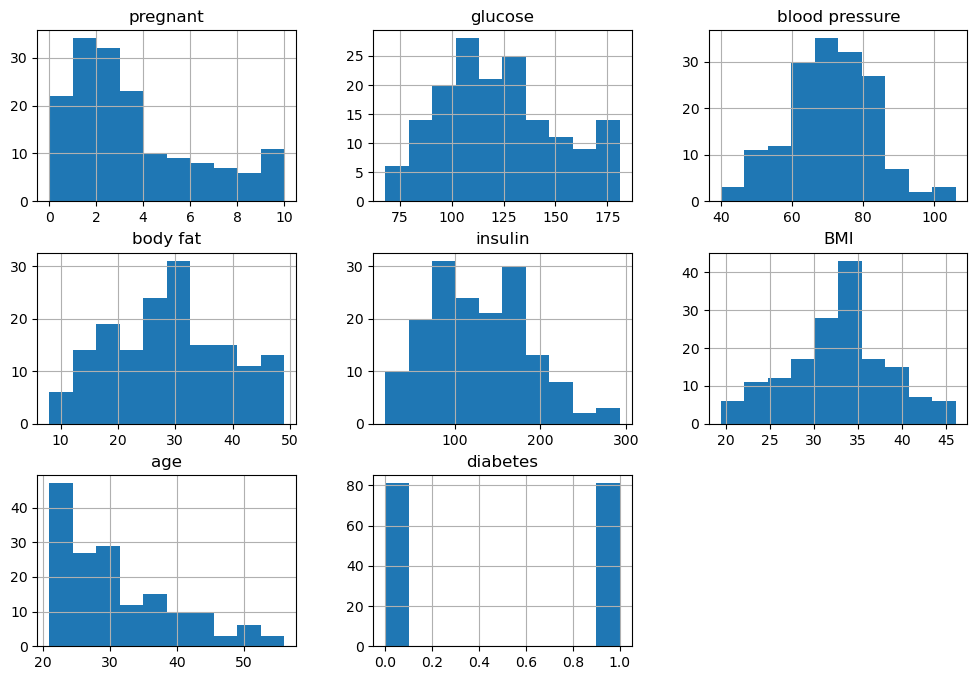

In [208]:
d_df.hist(figsize=(12, 8))

- pregnant의 차이가 좀 있어서 로그변환

In [209]:
# pregnant를 log 변환
d_df['pregnant'] = np.log1p(d_df['pregnant'])

array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'blood pressure'}>],
       [<Axes: title={'center': 'body fat'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

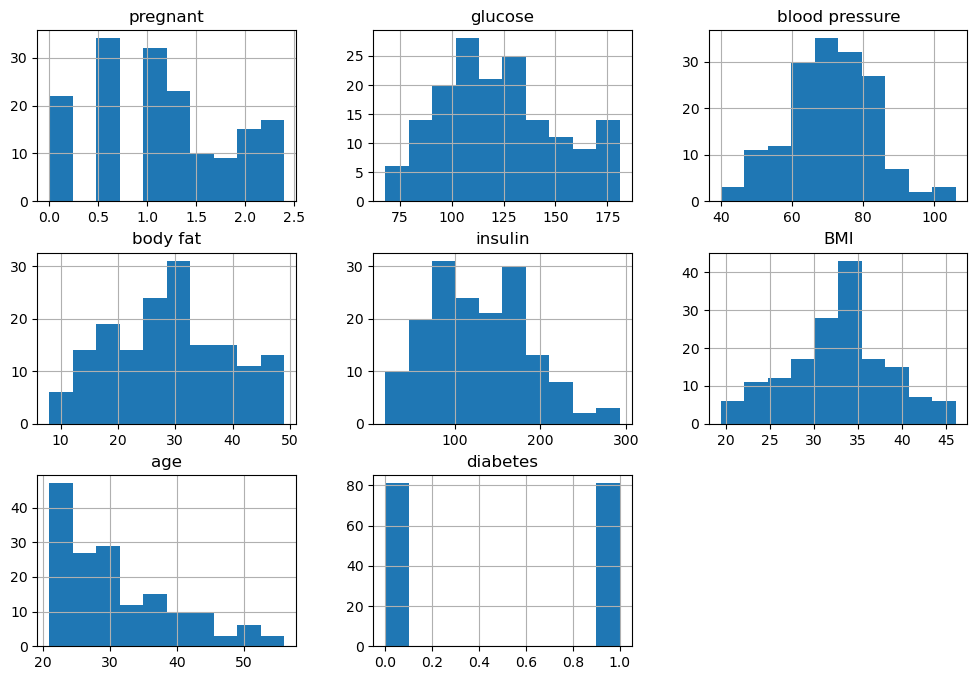

In [210]:
d_df.hist(figsize=(12, 8))

In [211]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = d_df.iloc[:, :-1], d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(random_state=124)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=124)

In [213]:
# from sklearn.tree import export_graphviz

# unique_labels = d_df['diabetes'].unique()

# # 클래스 레이블 리스트로 변환
# class_labels = [str(label) for label in unique_labels]

# export_graphviz(
#     dtc, 
#     out_file='./images/diabetes02.dot', 
#     class_names=class_labels, 
#     feature_names=features.columns, 
#     impurity=True, 
#     filled=True
# )

In [214]:
# import graphviz

# with open('./images/diabetes02.dot') as f:
#     mushroom_dtc02 = f.read()

# diabetes_dtc02_graph = graphviz.Source(mushroom_dtc02)

In [215]:
# diabetes_dtc02_graph.render(filename='diabetes02', directory='./images', format='png')

<img src='./images/diabetes02.png' width='800px'>

In [216]:
# 전체 행의 특정 데이터 선택하여 피처로 지정, 타겟 데이터를 타겟으로 지정
features_d, targets_d = d_df.iloc[:, [1, -3]], d_df.iloc[:, -1]

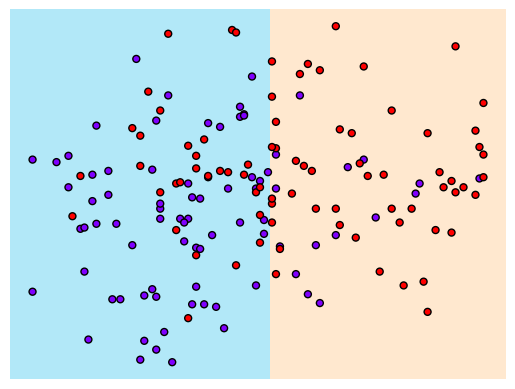

In [217]:
dtc = DecisionTreeClassifier(random_state=124, min_samples_leaf=30)

dtc.fit(features_d, targets_d)

visualize_boundary(dtc, features_d, targets_d)

#### rfc

In [218]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [7, 8, 9], 
    'min_samples_split': [10, 20, 30, 40, 50]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=50),
             n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [219]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 7, 'min_samples_split': 10}",0.698077,15
1,"{'max_depth': 7, 'min_samples_split': 20}",0.722436,10
2,"{'max_depth': 7, 'min_samples_split': 30}",0.737179,8
3,"{'max_depth': 7, 'min_samples_split': 40}",0.760256,3
4,"{'max_depth': 7, 'min_samples_split': 50}",0.721795,11
5,"{'max_depth': 8, 'min_samples_split': 10}",0.705769,14
6,"{'max_depth': 8, 'min_samples_split': 20}",0.728846,9
7,"{'max_depth': 8, 'min_samples_split': 30}",0.745513,4
8,"{'max_depth': 8, 'min_samples_split': 40}",0.769231,1
9,"{'max_depth': 8, 'min_samples_split': 50}",0.761538,2


In [220]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[12  5]
 [ 4 12]]
정확도: 0.7273, 정밀도: 0.7059, 재현율: 0.7500, F1: 0.7273, ROC-AUC: 0.7279
################################################################################


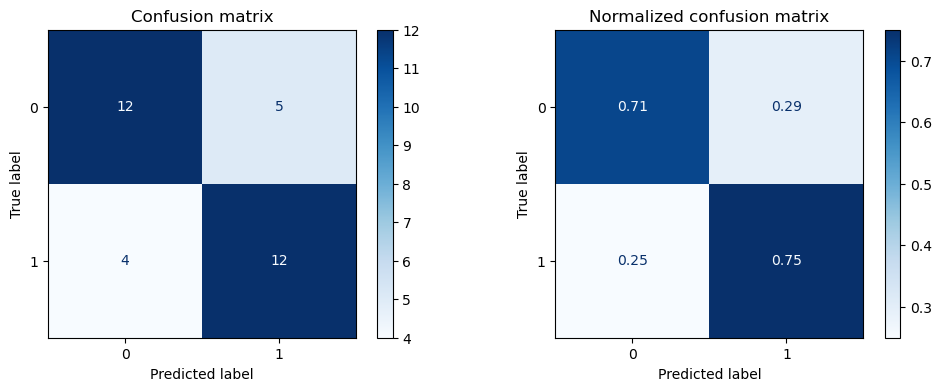

In [221]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

- 데이터 수가 엄청 작은것에 비해 생각보다 나쁘지 않게 나오긴 하였다.

#### gbc

In [222]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [40, 50, 60, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [40, 50, 60, 100, 150]})

In [223]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 40}",0.650769,9
1,"{'learning_rate': 0.3, 'n_estimators': 50}",0.666462,1
2,"{'learning_rate': 0.3, 'n_estimators': 60}",0.650769,9
3,"{'learning_rate': 0.3, 'n_estimators': 100}",0.651077,6
4,"{'learning_rate': 0.3, 'n_estimators': 150}",0.651385,5
5,"{'learning_rate': 0.5, 'n_estimators': 40}",0.650462,12
6,"{'learning_rate': 0.5, 'n_estimators': 50}",0.619692,20
7,"{'learning_rate': 0.5, 'n_estimators': 60}",0.620000,19
8,"{'learning_rate': 0.5, 'n_estimators': 100}",0.642769,18
9,"{'learning_rate': 0.5, 'n_estimators': 150}",0.651077,6


In [224]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

오차 행렬
[[13  4]
 [ 7  9]]
정확도: 0.6667, 정밀도: 0.6923, 재현율: 0.5625, F1: 0.6207, ROC-AUC: 0.6636
################################################################################


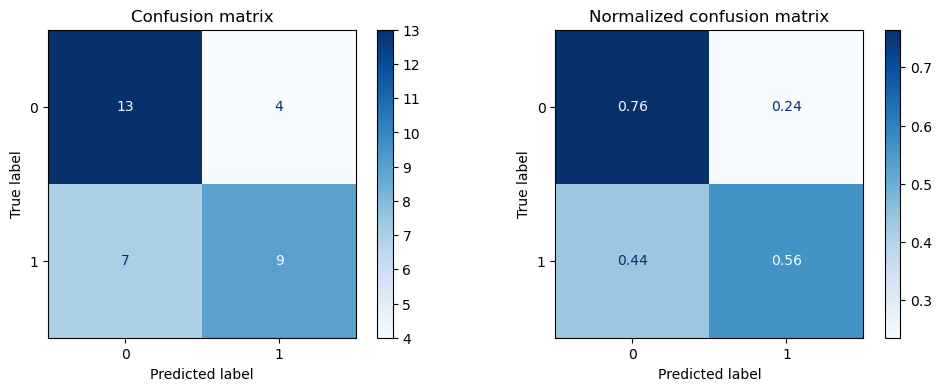

In [225]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

- 위의 랜덤 포레스트와 완전 같은 결과가 나왔다.

### 3 Cycle 결론
- 언더 샘플링 하여서 안그래도 적은 데이터의 수가 너무 적어져서 같은 결과가 나와서 별로 의미 없다고 판단하여
- 오버샘플링으로 다시 진행

### 4 Cycle
- 2cycle이 너무 높은 수치가 나와서 3cycle에서 언더샘플링으로 괜찮게 나오길 바랬지만 그렇지 않아서

In [331]:
import pandas as pd
d_df_origin = pd.read_csv('./datasets/Diabetes Binary Classification.csv')
d_df = d_df_origin.copy()
d_df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [332]:
# feature 명 변경
d_df.rename(columns={'Number of times pregnant': 'pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test': 'glucose',\
                     'Diastolic blood pressure (mm Hg)':'blood pressure', 'Triceps skin fold thickness (mm)':'body fat', \
                     '2-Hour serum insulin (mu U/ml)':'insulin', 'Body mass index (weight in kg/(height in m)^2)':'BMI', \
                     'Class variable (0 or 1)':'diabetes', 'Age (years)':'age'}, inplace=True)
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,Diabetes pedigree function,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [333]:
# 사용하지 않을 feature 제거
d_df = d_df.drop(['Diabetes pedigree function'], axis=1)

In [334]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_d = std.fit_transform(d_df.iloc[:, :-1])

In [335]:
std_d = pd.DataFrame(std_d, columns=d_df.iloc[:, :-1].columns)
std_d['diabetes'] = d_df.diabetes
std_d

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,-0.020496,1
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,1.170732,1


In [336]:
# 이상치 제거
features = std_d.iloc[:, :-1]
for column in features.columns:
    std_d.drop(
        std_d[~std_d[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_d[~std_d[column].between(-1.96, 1.96)].shape[0]}건')

pregnant: 0건
glucose: 0건
blood pressure: 0건
body fat: 0건
insulin: 0건
BMI: 0건
age: 0건


In [337]:
d_df = d_df.iloc[std_d.index].reset_index(drop=True)
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
568,9,89,62,0,0,22.5,33,0
569,2,122,70,27,0,36.8,27,0
570,5,121,72,23,112,26.2,30,0
571,1,126,60,0,0,30.1,47,1


In [338]:
# body fat의 0인 값 제거
d_df = d_df[d_df['body fat'] != 0]
# 인슐린의 0인 값 제거
d_df = d_df[d_df['insulin'] != 0]
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
6,3,78,50,32,88,31.0,26,1
9,5,166,72,19,175,25.8,51,1
10,0,118,84,47,230,45.8,31,1
...,...,...,...,...,...,...,...,...
556,1,81,74,41,57,46.3,32,0
559,1,121,78,39,74,39.0,28,0
562,1,128,88,39,110,36.5,37,1
566,2,88,58,26,16,28.4,22,0


In [339]:
d_df

,pregnant,glucose,blood pressure,body fat,insulin,BMI,age,diabetes
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
6,3,78,50,32,88,31.0,26,1
9,5,166,72,19,175,25.8,51,1
10,0,118,84,47,230,45.8,31,1
...,...,...,...,...,...,...,...,...
556,1,81,74,41,57,46.3,32,0
559,1,121,78,39,74,39.0,28,0
562,1,128,88,39,110,36.5,37,1
566,2,88,58,26,16,28.4,22,0


array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'blood pressure'}>],
       [<Axes: title={'center': 'body fat'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

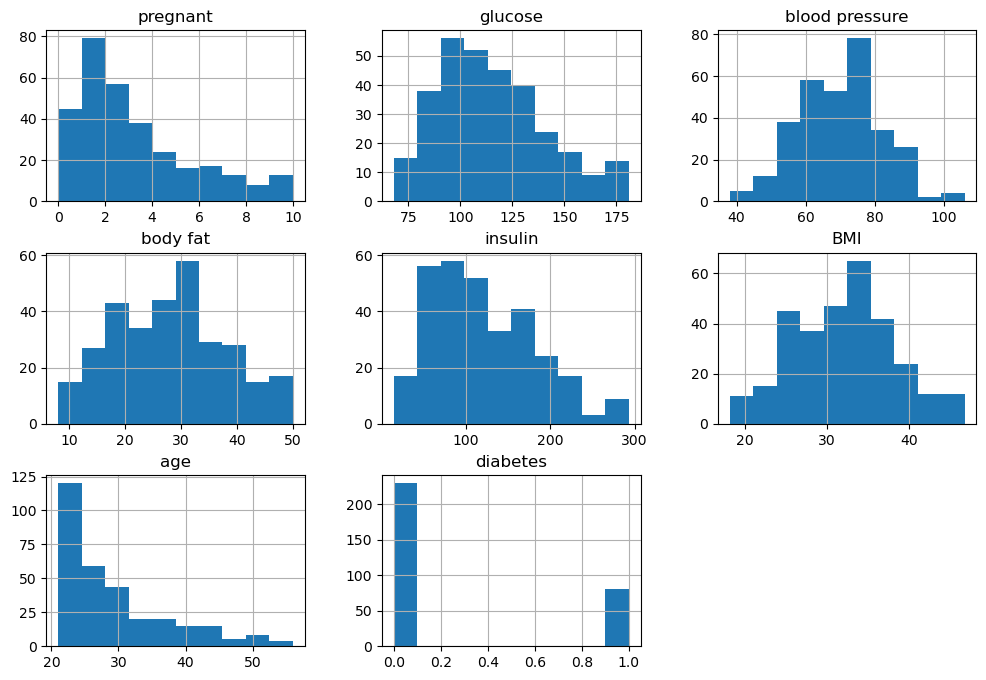

In [340]:
d_df.hist(figsize=(12, 8))

In [341]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = d_df.iloc[:, :-1], d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# target피쳐의 불균형을 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

diabetes
0    183
1    183
Name: count, dtype: int64

In [342]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [10, 11, 12], 
    'min_samples_split': [30, 40, 50, 60, 70]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=50),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [30, 40, 50, 60, 70]})

In [343]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 30}",0.795646,5
1,"{'max_depth': 10, 'min_samples_split': 40}",0.792793,7
2,"{'max_depth': 10, 'min_samples_split': 50}",0.779279,13
3,"{'max_depth': 10, 'min_samples_split': 60}",0.762763,15
4,"{'max_depth': 10, 'min_samples_split': 70}",0.798273,4
5,"{'max_depth': 11, 'min_samples_split': 30}",0.809309,2
6,"{'max_depth': 11, 'min_samples_split': 40}",0.790165,9
7,"{'max_depth': 11, 'min_samples_split': 50}",0.787462,10
8,"{'max_depth': 11, 'min_samples_split': 60}",0.776426,14
9,"{'max_depth': 11, 'min_samples_split': 70}",0.795571,6


In [344]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

In [345]:
rfc

RandomForestClassifier(max_depth=12, min_samples_split=40, n_estimators=50)

오차 행렬
[[40  6]
 [ 5 11]]
정확도: 0.8226, 정밀도: 0.6471, 재현율: 0.6875, F1: 0.6667, ROC-AUC: 0.7785
################################################################################


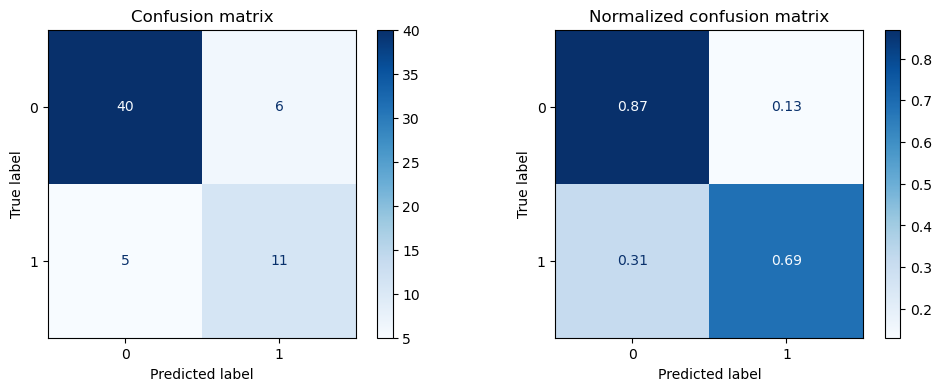

In [346]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

In [347]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    # n_estimators가 높을수록 모델이 복잡해지고 과적합 위험이 있다
    'n_estimators': [50, 100, 150, 200, 300, 400],
    # learning_rate : 각 트리의 가중치를 부여한다. 낮을수록 모델이 안정적이고 과적합의 위험을 줄여준다.
    # 하지만 낮을수록 트리가 더 많이 필요할 수 있다.
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200, 300, 400]})

In [348]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.827730,23
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.844169,15
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.838689,21
3,"{'learning_rate': 0.3, 'n_estimators': 200}",0.844169,13
4,"{'learning_rate': 0.3, 'n_estimators': 300}",0.846909,10
5,"{'learning_rate': 0.3, 'n_estimators': 400}",0.852425,5
6,"{'learning_rate': 0.5, 'n_estimators': 50}",0.844169,15
7,"{'learning_rate': 0.5, 'n_estimators': 100}",0.852314,8
8,"{'learning_rate': 0.5, 'n_estimators': 150}",0.857867,1
9,"{'learning_rate': 0.5, 'n_estimators': 200}",0.841503,19


In [349]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

In [350]:
gbc

GradientBoostingClassifier(learning_rate=0.5, n_estimators=150)

오차 행렬
[[40  6]
 [ 7  9]]
정확도: 0.7903, 정밀도: 0.6000, 재현율: 0.5625, F1: 0.5806, ROC-AUC: 0.7160
################################################################################


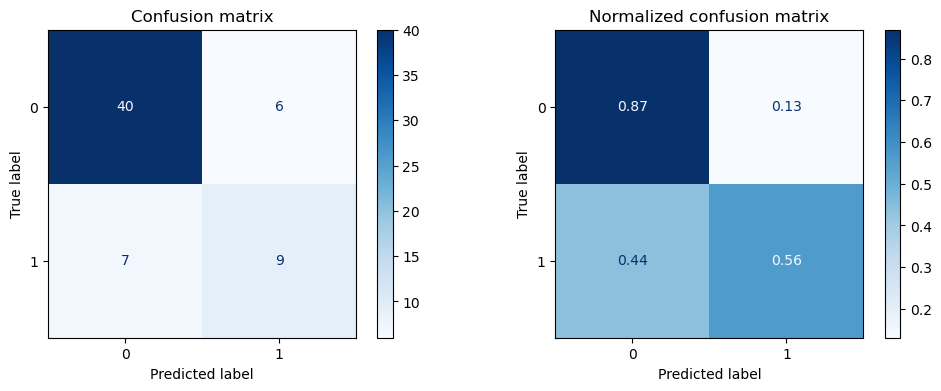

In [351]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

In [352]:
from xgboost import XGBClassifier

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [353]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.37260	validation_1-logloss:0.31529
[1]	validation_0-logloss:0.29695	validation_1-logloss:0.23984
[2]	validation_0-logloss:0.19303	validation_1-logloss:0.15661
[3]	validation_0-logloss:0.15123	validation_1-logloss:0.11711
[4]	validation_0-logloss:0.13154	validation_1-logloss:0.10326
[5]	validation_0-logloss:0.10902	validation_1-logloss:0.07087
[6]	validation_0-logloss:0.08530	validation_1-logloss:0.05308
[7]	validation_0-logloss:0.07563	validation_1-logloss:0.04855
[8]	validation_0-logloss:0.06517	validation_1-logloss:0.04401
[9]	validation_0-logloss:0.05836	validation_1-logloss:0.03660
[10]	validation_0-logloss:0.05172	validation_1-logloss:0.03741
[11]	validation_0-logloss:0.04784	validation_1-logloss:0.03395
[12]	validation_0-logloss:0.04316	validation_1-logloss:0.03143
[13]	validation_0-logloss:0.04080	validation_1-logloss:0.02936
[14]	validation_0-logloss:0.03777	validation_1-logloss:0.02857
[15]	validation_0-logloss:0.03523	validation_1-logloss:0.02624
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200, 250]},
             return_train_score=True)

In [354]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.846872,6
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.841466,12
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.841466,12
3,"{'learning_rate': 0.3, 'n_estimators': 200}",0.841466,12
4,"{'learning_rate': 0.3, 'n_estimators': 250}",0.841466,12
5,"{'learning_rate': 0.5, 'n_estimators': 50}",0.849611,2
6,"{'learning_rate': 0.5, 'n_estimators': 100}",0.846872,6
7,"{'learning_rate': 0.5, 'n_estimators': 150}",0.841429,16
8,"{'learning_rate': 0.5, 'n_estimators': 200}",0.846872,6
9,"{'learning_rate': 0.5, 'n_estimators': 250}",0.841466,11


In [355]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

In [356]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

오차 행렬
[[40  6]
 [ 8  8]]
정확도: 0.7742, 정밀도: 0.5714, 재현율: 0.5000, F1: 0.5333, ROC-AUC: 0.6848
################################################################################


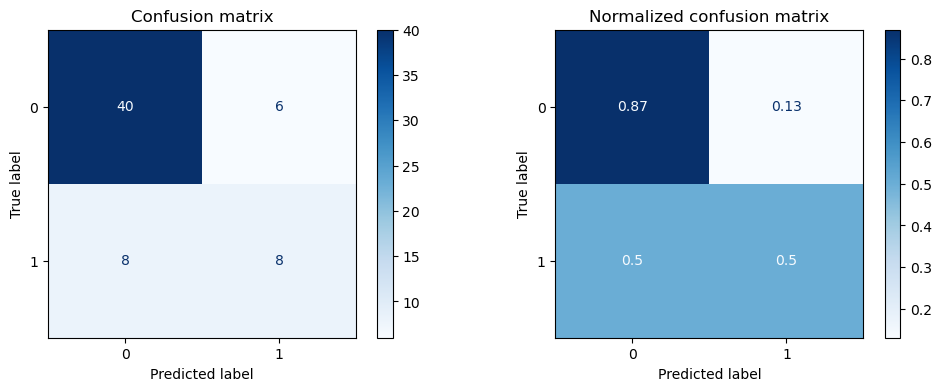

In [357]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

In [358]:
from lightgbm import LGBMClassifier

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 183, number of negative: 183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [359]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.838652,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.835913,12
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.838689,6
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.838652,9
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.846835,2
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.844021,4
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.841392,5
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.844132,3
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.846909,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.838689,6


In [360]:
lgbm = g_lgbm.best_estimator_

lgbm_prediction = lgbm.predict(X_test)

In [361]:
lgbm

LGBMClassifier(learning_rate=0.7, n_estimators=150)

오차 행렬
[[41  5]
 [ 7  9]]
정확도: 0.8065, 정밀도: 0.6429, 재현율: 0.5625, F1: 0.6000, ROC-AUC: 0.7269
################################################################################


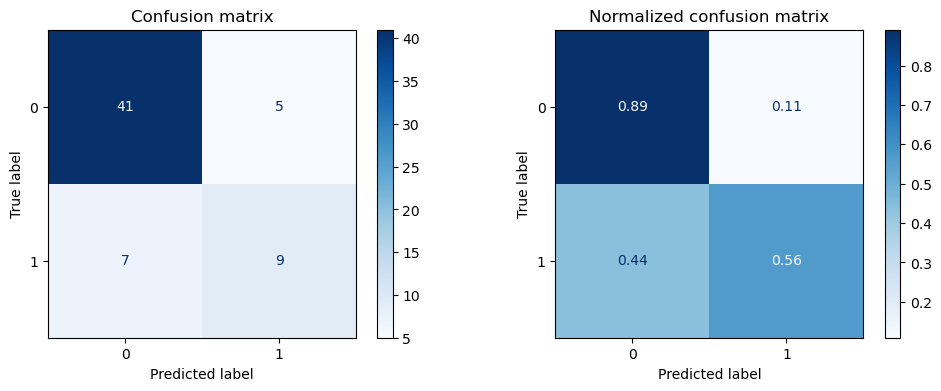

In [362]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

Model		Accuracy	Precision	Recall		F1 Score
rfc		0.8226		0.6471		0.6875		0.6667
gbc		0.7903		0.6000		0.5625		0.5806
xgb		0.7742		0.5714		0.5000		0.5333
lgbm		0.8065		0.6429		0.5625		0.6000


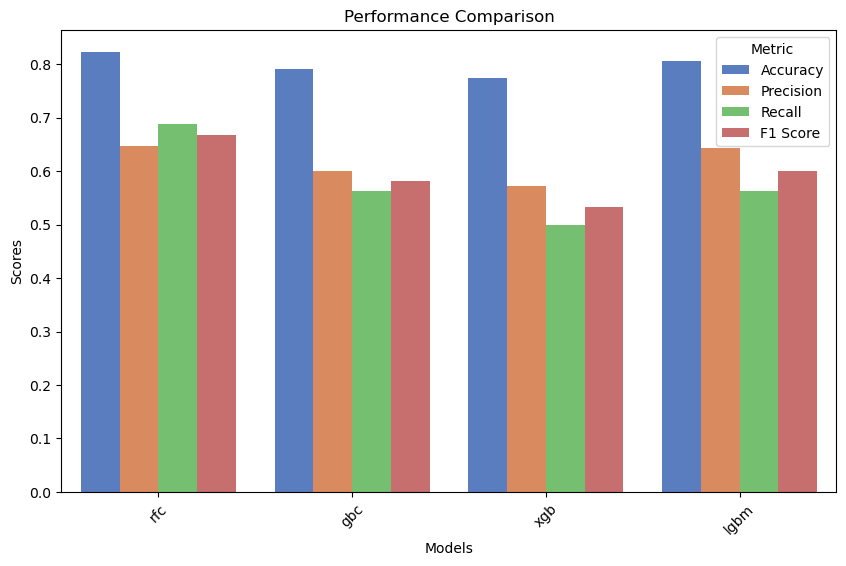

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ['rfc', 'gbc', 'xgb', 'lgbm']

accuracies = [accuracy_score(y_test, rfc_prediction), accuracy_score(y_test, gbc_prediction),
              accuracy_score(y_test, xgb_prediction), accuracy_score(y_test, lgbm_prediction)]

precisions = [precision_score(y_test, rfc_prediction), precision_score(y_test, gbc_prediction),
              precision_score(y_test, xgb_prediction), precision_score(y_test, lgbm_prediction)]

recalls = [recall_score(y_test, rfc_prediction), recall_score(y_test, gbc_prediction),
           recall_score(y_test, xgb_prediction), recall_score(y_test, lgbm_prediction)]

f1_scores = [f1_score(y_test, rfc_prediction), f1_score(y_test, gbc_prediction),
             f1_score(y_test, xgb_prediction), f1_score(y_test, lgbm_prediction)]

# 성능 지표 출력
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for i in range(len(model_names)):
    print(f"{model_names[i]}\t\t{accuracies[i]:.4f}\t\t{precisions[i]:.4f}\t\t{recalls[i]:.4f}\t\t{f1_scores[i]:.4f}")

# 데이터프레임 생성
import pandas as pd
data = pd.DataFrame({
    'Model': model_names * 4,
    'Metric': ['Accuracy'] * 4 + ['Precision'] * 4 + ['Recall'] * 4 + ['F1 Score'] * 4,
    'Score': accuracies + precisions + recalls + f1_scores
})

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=data, palette='muted')
plt.title('Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

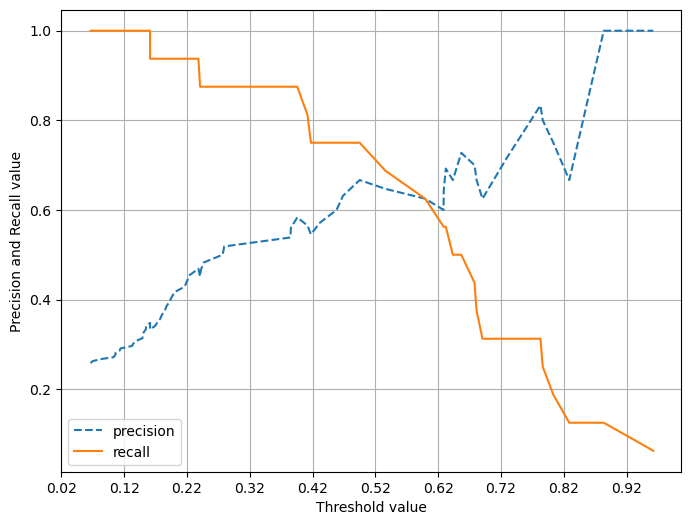

In [367]:
precision_recall_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

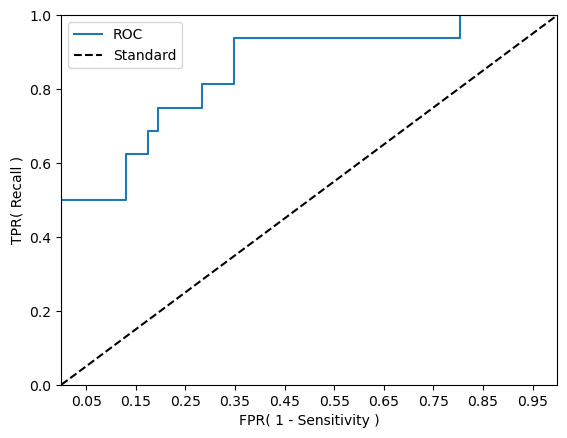

In [365]:
roc_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [402]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [7, 8, 9, 10, 11, 12], 
    'min_samples_split': [14, 15, 16, 20, 25, 30]
}

rfc = RandomForestClassifier(n_estimators=55)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 7, 'min_samples_split': 14}",0.811862,18
1,"{'max_depth': 7, 'min_samples_split': 15}",0.814640,13
2,"{'max_depth': 7, 'min_samples_split': 16}",0.803829,29
3,"{'max_depth': 7, 'min_samples_split': 20}",0.817492,11
4,"{'max_depth': 7, 'min_samples_split': 25}",0.801051,31
5,"{'max_depth': 7, 'min_samples_split': 30}",0.790165,35
6,"{'max_depth': 8, 'min_samples_split': 14}",0.811862,18
7,"{'max_depth': 8, 'min_samples_split': 15}",0.806381,28
8,"{'max_depth': 8, 'min_samples_split': 16}",0.822898,6
9,"{'max_depth': 8, 'min_samples_split': 20}",0.806456,26


In [403]:
rfc

RandomForestClassifier(max_depth=10, min_samples_split=14, n_estimators=55)

오차 행렬
[[40  6]
 [ 4 12]]
정확도: 0.8387, 정밀도: 0.6667, 재현율: 0.7500, F1: 0.7059, ROC-AUC: 0.8098
################################################################################


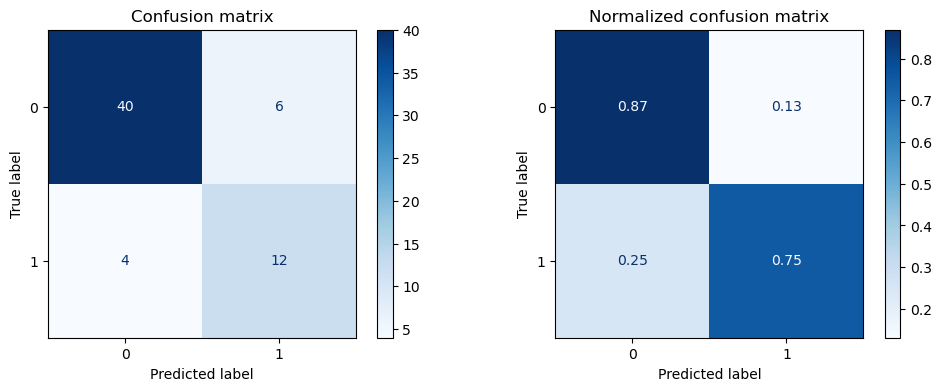

In [404]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

- 2Cycle에서 가장 결과가 괜찮았던 rfc모델의 하이퍼파라미터 조정과 best_estimator 사용으로
- 꽤 괜찮은 결과가 나왔다

#### 당뇨병 분류
> True Positive (TP): 모델이 당뇨병을 당뇨병으로 분류한 경우  
> False Positive (FP): 모델이 당뇨병을 정상으로 잘못 분류한 경우  
> True Negative (TN): 모델이 정상인을 정상으로 올바르게 분류한 경우  
> False Negative (FN): 모델이 정상인을 당뇨병으로 잘못 분류한 경우  

- 임계치를 높여 정밀도를 올려주는 것이 적합하다.
- 당뇨병 환자를 정상으로 판단하여 오진 시 문제가 생기지만, 정상인에게 조심하라고 하는건 별로 상관 없을 것 같기 때문.

In [411]:
from sklearn.preprocessing import Binarizer
thresholds = [0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]

def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [412]:
proba_class1 = rfc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.0490488 , 0.05577064, 0.06163719, 0.07177217, 0.0735536 ,
       0.07445023, 0.08607673, 0.1018094 , 0.11160968, 0.11519546,
       0.1198965 , 0.12306578, 0.12952249, 0.13278522, 0.13739233,
       0.13887982, 0.14203883, 0.15457666, 0.16092918, 0.16472008,
       0.16629858, 0.171689  , 0.18028814, 0.1960864 , 0.20204151,
       0.2127483 , 0.21540857, 0.23238605, 0.23277683, 0.23407062,
       0.24798863, 0.25339809, 0.25585615, 0.25915245, 0.26559802,
       0.31827541, 0.3418692 , 0.34590407, 0.36275473, 0.3892882 ,
       0.41956994, 0.44706739, 0.47951677, 0.48736135, 0.50725311,
       0.5316436 , 0.54965585, 0.56480841, 0.58746583, 0.60977643,
       0.63435899, 0.64388182, 0.66919552, 0.69760208, 0.73445749,
       0.76364373, 0.76934257, 0.78509918, 0.79199405, 0.83184956,
       0.85888338, 0.95912224])

In [413]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.04904880066926224
오차 행렬
[[ 1 45]
 [ 0 16]]
정확도: 0.2742, 정밀도: 0.2623, 재현율: 1.0000, F1: 0.4156, ROC-AUC: 0.5109
################################################################################
0.05577063974896791
오차 행렬
[[ 2 44]
 [ 0 16]]
정확도: 0.2903, 정밀도: 0.2667, 재현율: 1.0000, F1: 0.4211, ROC-AUC: 0.5217
################################################################################
0.06163719381379901
오차 행렬
[[ 3 43]
 [ 0 16]]
정확도: 0.3065, 정밀도: 0.2712, 재현율: 1.0000, F1: 0.4267, ROC-AUC: 0.5326
################################################################################
0.07177217256896401
오차 행렬
[[ 4 42]
 [ 0 16]]
정확도: 0.3226, 정밀도: 0.2759, 재현율: 1.0000, F1: 0.4324, ROC-AUC: 0.5435
################################################################################
0.0735536032594856
오차 행렬
[[ 5 41]
 [ 0 16]]
정확도: 0.3387, 정밀도: 0.2807, 재현율: 1.0000, F1: 0.4384, ROC-AUC: 0.5543
################################################################################
0.07445022985270662
오차 행렬
[[ 6 40]
 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [416]:
# 조정
from sklearn.preprocessing import Binarizer

threshold = 0.5648084053107977

proba = rfc.predict_proba(X_test)
prediction = rfc.predict(X_test)

오차 행렬
[[42  4]
 [ 6 10]]
정확도: 0.8387, 정밀도: 0.7143, 재현율: 0.6250, F1: 0.6667, ROC-AUC: 0.7690
################################################################################


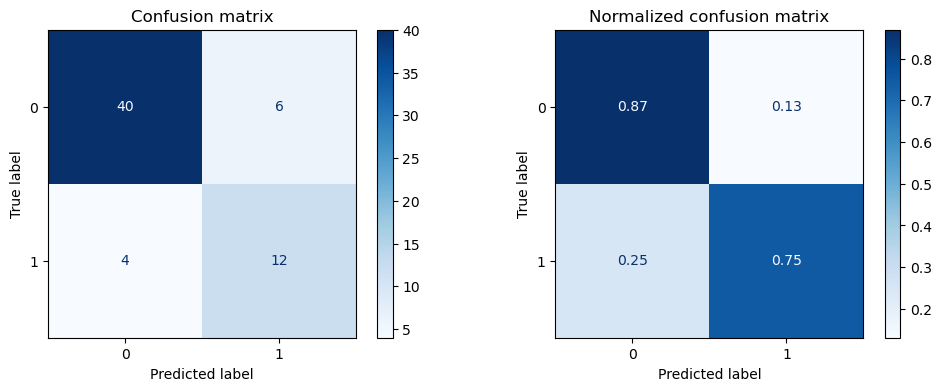

In [417]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction, rfc, X_test)

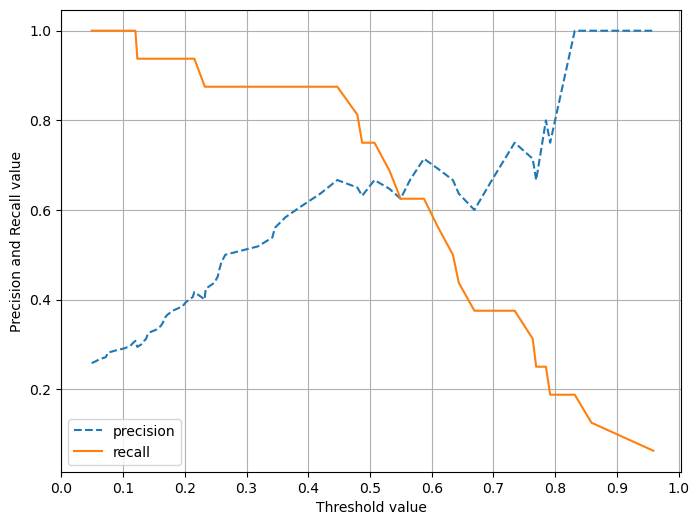

In [418]:
precision_recall_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

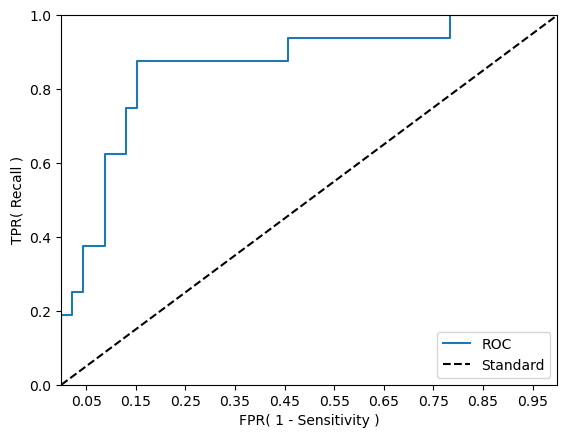

In [419]:
roc_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

### 4Cycle 결론
- 하이퍼 파라미터 튜닝을 통해 원하던 정도의 수치를 얻었고, 임계치 조절을 통해 정밀도를 0.7 이상으로 만드는데는 성공하였으나
- 거의 억지로 만든 느낌이었다
- 또한 히스토그램을 통해 확인했던 데이터들의 분포를 보고 로그변환이나 아예 피쳐를 삭제해보기도하고 값 대체도 해보았으나, 데이터의 양이 너무 적어서
- 로그변환은 오히려 이상한 결과가 나왔었으며, 피쳐 삭제 또한 타겟컬럼과의 연관 및 중요도로 인해 분포가 이상한 피쳐를 삭제하였을 때 굉장히 이상한 결과가 나왔었다
- 결국 0인 값을 삭제하는것이 가장 좋은 결과가 나왔고, 이상치 또한 제거하는것이 가장 좋은 결과가 나왔다